# MRA*

### base imports and tuning

In [1]:
import matplotlib.pyplot as plt
from scipy.ndimage.filters import uniform_filter1d

plt.rcParams['figure.figsize'] = [15, 5]
EPS = 0.000001

In [2]:
import sys
import os

search_tools_path = os.path.join(os.getcwd(), 'search_tools')
if search_tools_path not in sys.path:
    sys.path.append(search_tools_path)

In [3]:
%load_ext autoreload
%autoreload 2

### pipeline

In [4]:
from moving_ai.mai_map_reader import MaiReader, MaiMaps
from pipeline import Pipeline
from moving_ai.mai_map_visualizer import VisualizeMaiMap, VisualizeMaiMapGif

from algorithms.astar_heuristics import diagonal_dist
from algorithms.mrastar import MRAstar
from algorithms.wastar import WAstar
from algorithms.astar import Astar

In [5]:
def init_map_reader():
    map_reader_0 = MaiReader(MaiMaps.DEN001D)
    selected_task_callback = lambda t: t.start_c == (91, 23) and t.goal_c == (141, 25)
    selected_task = filter(selected_task_callback, map_reader_0.read_tasks()).__next__()
    return map_reader_0.with_task(selected_task)

map_reader = init_map_reader()

In [9]:
algorithms = [
    Astar(diagonal_dist),
    WAstar(diagonal_dist, 3),
    MRAstar(diagonal_dist, resolutions=(1, 3), w_1=3, w_2=3),
]

p = Pipeline(
    reader=map_reader,
    algorithms=algorithms,
    processor=VisualizeMaiMap()
)

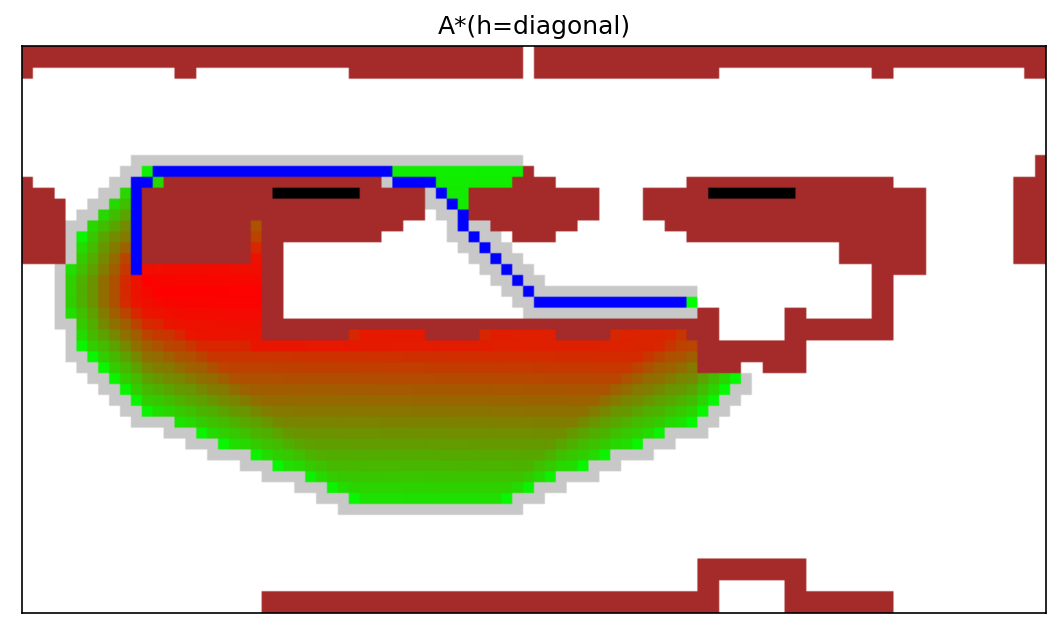

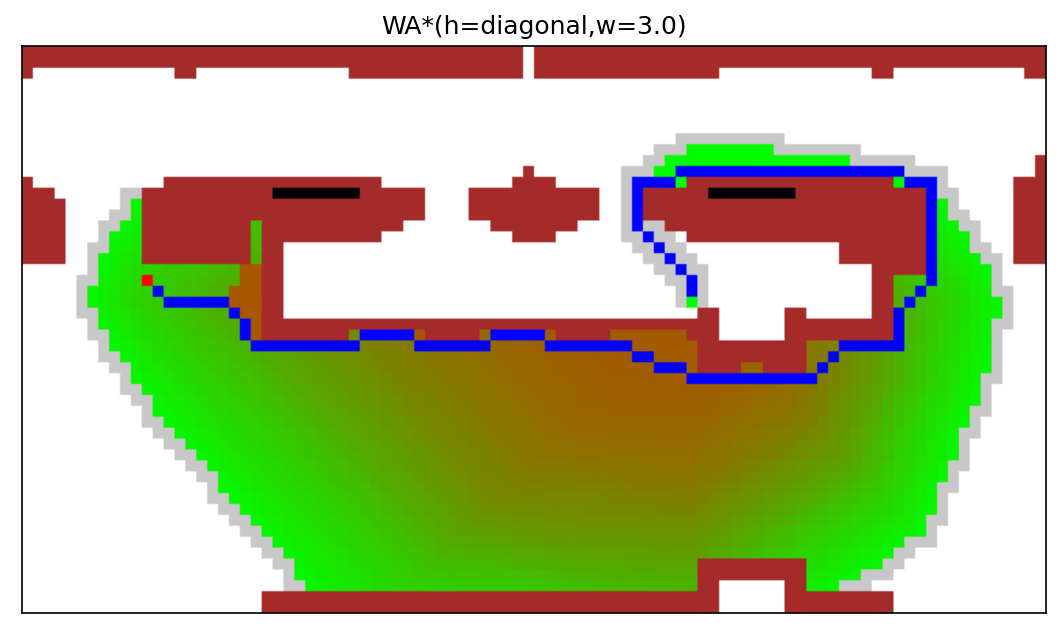

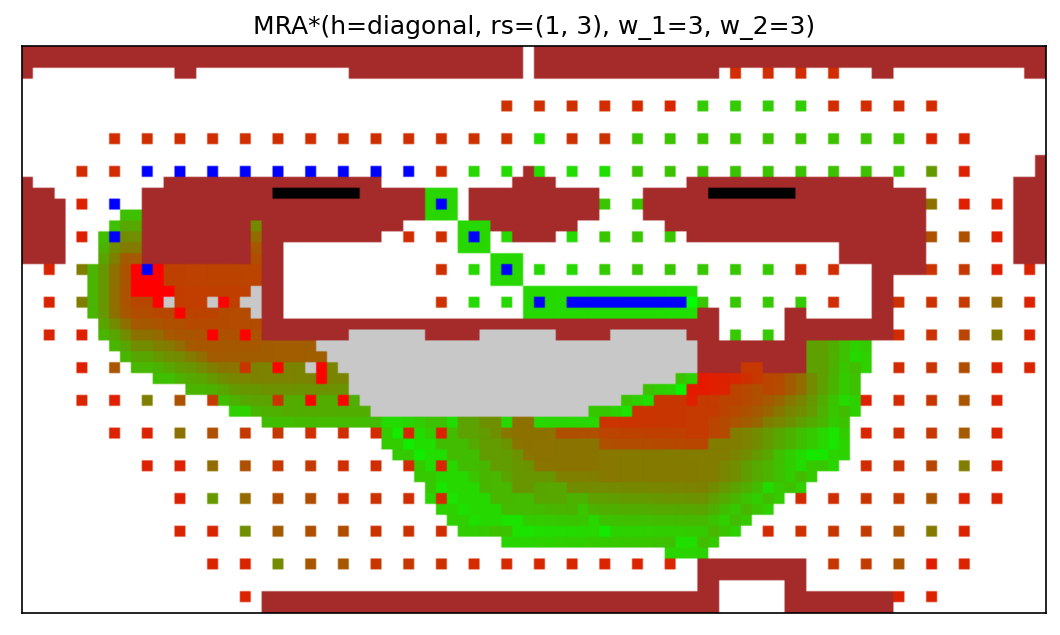

In [10]:
p.run()

In [ ]:
p.with_processor(VisualizeMaiMapGif()).run()